##                                                 LINEAR REGRESSION
In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied using linear regression. This is a simple linear regression task as it involves two variables.

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Reading the data in from url

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# take a look at the dataset
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Exploration
Lets first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

### Splitting the data into X and Y as feature(X) and a Target(Y)

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Now, lets plot feature vs the Target, to see how linear is their relation:

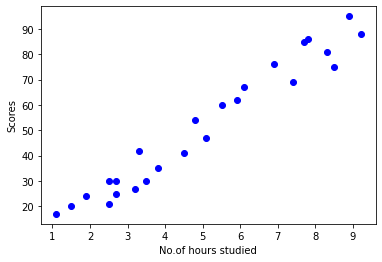

In [6]:
plt.scatter(x,y ,color='blue')
plt.xlabel("No.of hours studied")
plt.ylabel("Scores")
plt.show()

### Splitting the Data into training and validation set (Here Training set is of 80% and validation is of 20%)

In [7]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state = 1)

#### Modeling
Using sklearn package to model data.

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [10.46110829]
Intercept:  -1.5369573315500702


#### Plot outputs
we can plot the fit line over the data:


Equation of line: coef * X + intercept

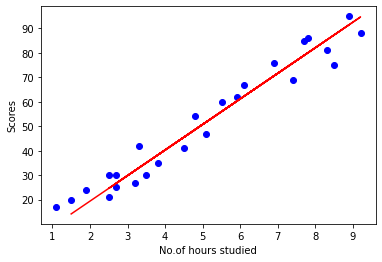

In [9]:
plt.scatter(x,y,  color='blue')
plt.plot(train_x, model.coef_*train_x + model.intercept_, '-r')
plt.xlabel("No.of hours studied")
plt.ylabel("Scores")
plt.show()

### Predicting the values


In [10]:
pred = model.predict(val_x)
pd.DataFrame({"Actual_values" : val_y, "Predicted_values" : pred})

,Actual_values,Predicted_values
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# Predicting score of student if he study for 9.25 hrs

In [11]:
hr = np.array([[9.25]])
my_pred = model.predict(hr)
print('Score of student for studying 9.25 hours:',my_pred[0])

Score of student for studying 9.25 hours: 95.22829438402952


### Evaluation of model

In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
print("Mean absolute error: %.2f" % mean_absolute_error(val_y,pred))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(val_y,pred))
print("R2-score: %.2f" % r2_score(val_y,pred))

Mean absolute error: 7.88
Residual sum of squares (MSE): 68.88
R2-score: 0.84


#### Plotting actual values against predicted values 

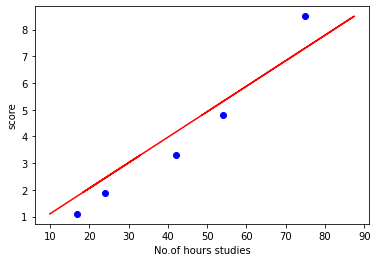

In [13]:
plt.plot(pred,val_x,color='red')
plt.scatter(val_y,val_x,color='blue')
plt.xlabel('No.of hours studies')
plt.ylabel('score')
plt.show()

#### Accuracy

In [14]:
model.score(train_x,train_y)

0.9637848283990599